#**MSIN0097 Individual Assignment- Neural Network Exploration**

### Candidate Number: ZPKJ0
### Word Count: 1931

##**Red Wine Quality Prediction**

# Table of Content

>[Introduction](#scrollTo=UzeGzGC8gYoV)

>[Import packages](#scrollTo=e7d220e3)

>[Get the data](#scrollTo=dcea0ac0)

>[Exploratory Data Analysis](#scrollTo=SrmLuGW49Ara)

>[Prepare data for machine learning](#scrollTo=2y3JNOap9QO1)

>>[Asign output classes](#scrollTo=kVeAHrGi9Zk-)

>>[Data preparation for spliting](#scrollTo=wliBxcsH9ib0)

>>[Split Dataset to training, validation, and test data](#scrollTo=ZB6zu1hQFXtn)

>>[Scale the data sets](#scrollTo=WJ9RTmSAFcFy)

>[Neural Network Learning- MLP model for multi- class clsssification](#scrollTo=RSaRMoNqv1TY)

>[Fine-tune Hyperparameters](#scrollTo=iseoL7Hp_NKA)

>>[Random Search for top3 combination](#scrollTo=m4mk5kZR_VSj)

>>[Top 1 Hyperparameters](#scrollTo=ZvTSx6xaXive)

>>[Top 2 hyperparameters](#scrollTo=66CBHuKCbQWZ)

>>[Top 3 hyperparameters](#scrollTo=V49oYIwHbX73)

>>[Fine-tune epoch and batch size](#scrollTo=9vuzTEc824vg)

>>[Tune Dropout Rate](#scrollTo=aP8XI7FMcbRF)

>[Other approach to increase accuracy](#scrollTo=wRoNhEQiAcXw)

>>[PCA for feature selection](#scrollTo=OerKu2xJZGUw)

>[Present solution for testing data](#scrollTo=5l6E-9d9B0T6)

>[Summary](#scrollTo=bNlC2s16AuJU)

>[Resources](#scrollTo=3yuIAjCN4HGp)



#Introduction


The Red Wine Quality dataset chosen for this project is a popular dataset for machine learning research and education. It is available on both the UCI Machine Learning Repository and Kaggle, and contains 1599 instances and 12 attributes. The attributes include various chemical properties of red wine, such as fixed acidity, volatile acidity, and alcohol content, as well as the quality rating of the wine. The goal of this project is to predict the quality rating of red wine based on its chemical properties, using MLP multi-class classification. The quality rating is a categorical variable with six levels, ranging from 1 as the worst to 6 as the best quality. By applying MLP multi-class classification to this dataset, the target is to develop a model that can accurately predict the quality of red wine based on its chemical properties, which can be useful in the wine industry and for wine connoisseurs. The reason to choose multi-class classification over binary classification is that the decision between good and bad quality should be decided by the wine connoisseurs instead of simply splitting the quality to two classes.

# Import packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import keras_tuner as kt
import tensorflow as tf
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle
from matplotlib.pyplot import figure
from sklearn.decomposition import PCA


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 KB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.9 MB/s eta 0:00:00


# Get the data

In [2]:
winequality = pd.read_csv('/content/winequality-red.csv')

#Exploratory Data Analysis

To understand more about the dataset, exploratory data analysis is done to gain more insights into the data. First, the head () function provides a brief look through the dataset. It is obvious that this dataset is fully numerical, including 12 features.

In [3]:
winequality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Next, it is important to see if there is missing data. Through the info() function, the result indicates that there is no missing data in 1599 instances and that besides "quality" data is an integer type, others are float type. 

In [4]:
winequality.info()

# count number of null values in each column
null_counts = winequality.isnull().sum()
print('There are', null_counts.sum(), 'null values in the DataFrame.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
There are 0 null values in the DataFrame.


Since the dataset is numerical, the describe()  function is very useful for understanding the distribution and statistical numbers to overview the data.

In [5]:
winequality.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


A correlation matrix is presented here to show the relationship between variables, helping us to identify which variables are positively or negatively associated and the strength of those relationships. 

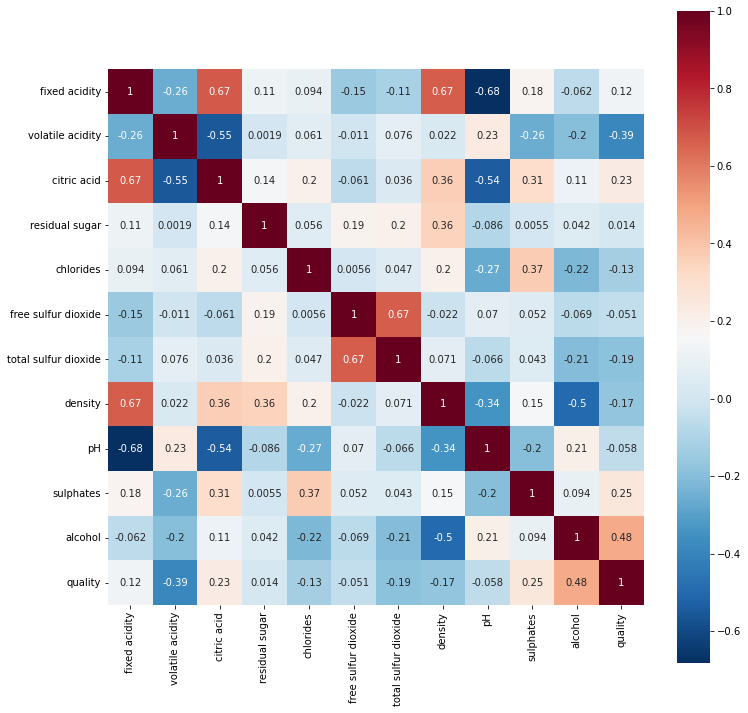

In [6]:
#create correlation matrix
corr_matrix = winequality.corr()

plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, square=True, annot=True, cmap="RdBu_r")

# Display the heatmap
plt.show()

Using the hist() function, the distribution of all attributes is displayed.  For some of the attributes, the data is right-skewed. And there might be some data imbalance problem for "quality".

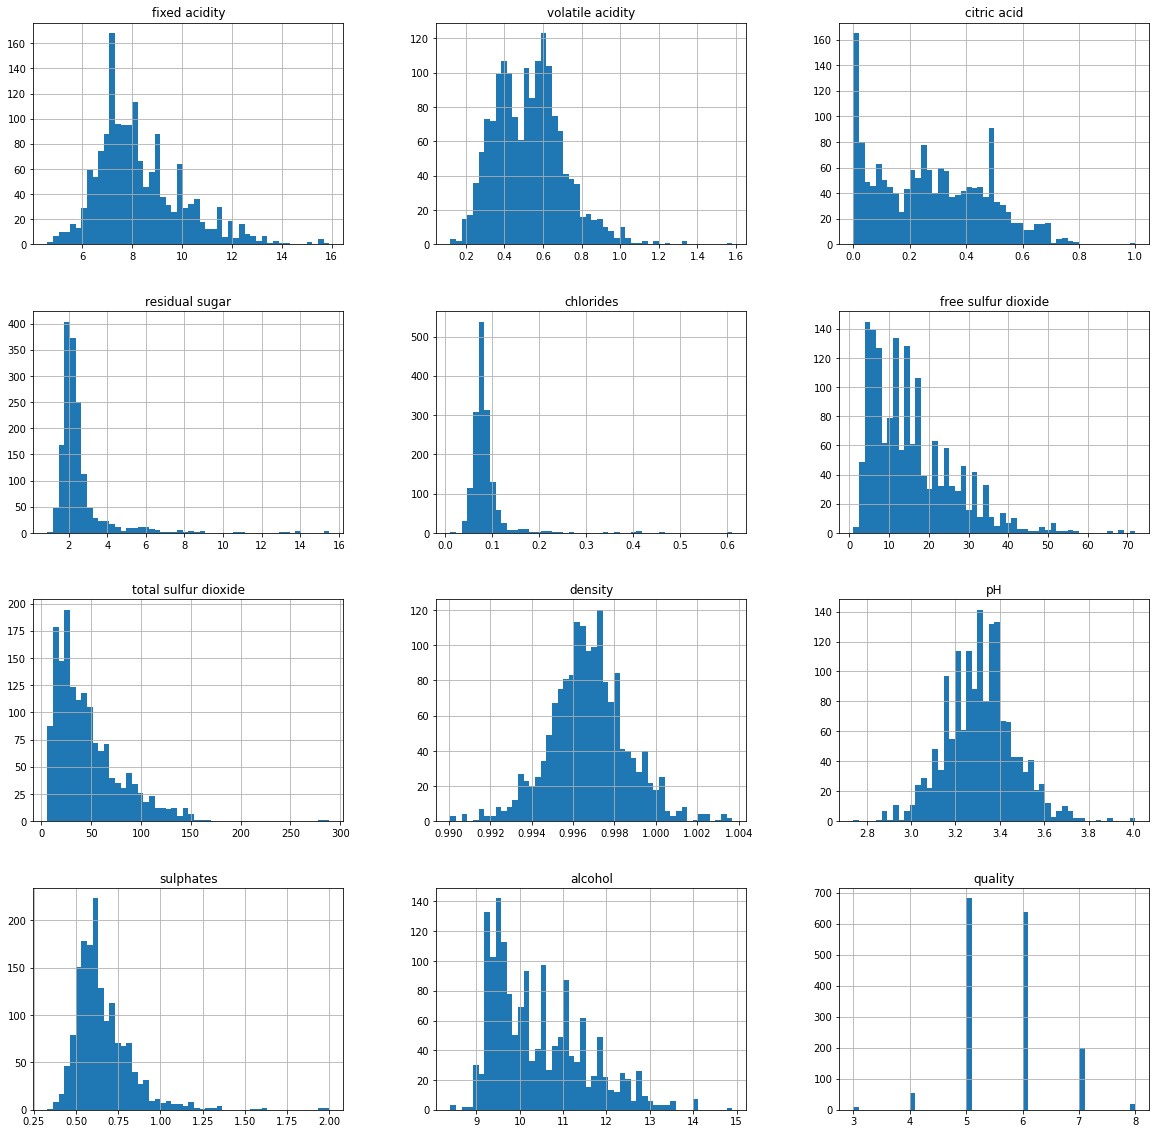

In [7]:
# distribution of the wine quality data
winequality.hist(bins= 50, figsize=(20,20))
plt.show()

Last, the data is filtered by their quality, there is a total of six categories from 3 to 8 and mainly concentrated at categories 2 and 3.

In [8]:
#see the classes of "quality" column
winequality.groupby('quality').count().reset_index()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,3,10,10,10,10,10,10,10,10,10,10,10
1,4,53,53,53,53,53,53,53,53,53,53,53
2,5,681,681,681,681,681,681,681,681,681,681,681
3,6,638,638,638,638,638,638,638,638,638,638,638
4,7,199,199,199,199,199,199,199,199,199,199,199
5,8,18,18,18,18,18,18,18,18,18,18,18


# Prepare data for machine learning

##Asign output classes

Since the original data set quality is rated from 3 to 8, it is re-assigned to 0 to 5 for a better understanding. 

In [9]:
#Turn the quality into class 1~5, with class 5 with highest quality and class 1 as lowest quality
winequality['quality'].replace(to_replace={3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5}, inplace=True)

quality_counts = winequality['quality'].value_counts().sort_index()
print(quality_counts)
#data is inbalance because some classes have significantly more samples than others.

0     10
1     53
2    681
3    638
4    199
5     18
Name: quality, dtype: int64


## Data preparation for spliting

The winequality dataset is separated into features and the target variable, where X contains all the features except for the target variable and y contains only the target variable (quality).

In [10]:
# Split the dataset into features and target
X = winequality.drop('quality', axis=1)
y = winequality['quality']


Shuffling the data is a common practice to ensure that the model does not learn any spurious patterns in the order of the data. By shuffling the data, it is to ensure that the model sees a random and diverse set of examples during training.

In [11]:
# shuffle the data
X, y = shuffle(X, y, random_state=52)


##Split Dataset to training, validation, and test data

The data is split into three subsets to run a neural network model: a training set, a validation set, and a test set. The validation set monitors the model's performance during training, tunes the model's hyper parameters, and prevents overfitting. It helps to ensure that the final model has good generalisation performance on new, unseen data.

In [12]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=52)

# Print the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")



X_train shape: (1023, 11)
y_train shape: (1023,)
X_val shape: (256, 11)
y_val shape: (256,)
X_test shape: (320, 11)
y_test shape: (320,)


##Scale the data sets

As seen in the exploratory data analysis, the dataset is dominated by classes 2 and 3. By standardising the features, it can ensure that each feature has the same scale and unit of measurement, which makes them comparable and avoids bias. 

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


# Neural Network Learning- MLP model for multi- class clsssification

A multilayer perceptron (MLP) is chosen here to train the model because it is a type of neural network commonly used for multi-class classification problems. An MLP consists of an input layer, one or more hidden layers, and an output layer. During training, the model adjusts the weights and biases of the neurons in each layer to minimise the loss function. 

#Fine-tune Hyperparameters

To train an MLP for multi-class classification, softmax activation function is typically used t in the output layer, which produces a probability distribution over the different classes. The model is trained using an appropriate loss function, such as sparse_categorical_crossentropy or categorical_crossentropy, and an optimisation algorithm, such as stochastic gradient descent (sgd),or Adam. Since categorical_crossentropy is used when the target variable is one-hot encoded, meaning that the data is categorical rather than numerical. The winequality dataset is fully numerical; thus, sparse_categorical_crossentropy is chosen as the loss function here. Accuracy is chosen for evaluating the performance of MLP in this project.

Below, the build_model function defines a flexible and customisable Keras model for multi-class classification that can be tuned using Keras Tuner to optimise its performance.

In [14]:

def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=6, default=2)
    n_neurons = hp.Int("n_neurons", min_value=8, max_value=320)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten()) 
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(6, activation="softmax"))
    
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"]) 
    return model




A random model is run first to briefly see how the model is performing when the hyperparameters are set without any basis. The model consists of one input layer, one hidden layer with 16 neurons, a rectified linear unit (ReLU) activation function, and one output layer with six neurons (a total of six classes for the output) and a softmax activation function.

8/8 [==============================] - 0s 3ms/step - loss: 1.2786 - accuracy: 0.4648
Val Loss is 1.27864408493042
Val Accuracy is 0.46484375


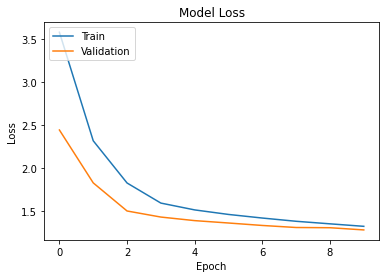

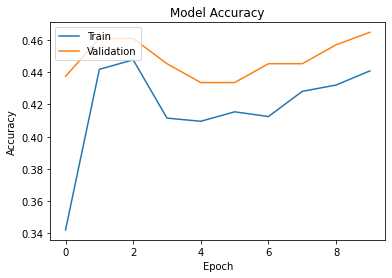

In [15]:

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

#Build model
model = Sequential()
model.add(Dense(units = 16, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(units=6, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, verbose=0)


#test model
ModelLoss, ModelAccuracy = model.evaluate(X_val, y_val)
#print result
print(f'Val Loss is { ModelLoss}')
print(f'Val Accuracy is {ModelAccuracy}')

import matplotlib.pyplot as plt


# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Random Search for top3 combination
(Learning Rate, Number of neurons, Optimizer, Number of layers )

Hyperparameter optimisation methods can help improve the performance of machine learning models by finding the optimal set of hyperparameters for a given problem.  Random Search is chosen here beside Grid Search or Bayesian Optimisation because it is simpler and easier to implement. Random search does not require an exhaustive search over the entire hyperparameter space, which will be computationally expensive and time-consuming.

According to Random Search, below the top three hyperparameter combination is printed out for further model use. The reason to print out three instead of choosing the best set is that Random Search does not guarantee the result is always the best; the effectiveness still depends on the search space, the number of hyperparameters being tuned and the quality of the performance metric being used to evaluate the model.

In [16]:
# Define the search space and the objective metric
tuner = kt.RandomSearch(
    build_model,
    objective="accuracy",
    max_trials=50,
    seed=52,
    directory="my_dir",
    project_name="my_project"
)

# Search for the best hyperparameters
tuner.search(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

# Get the best hyperparameters and the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)

Trial 50 Complete [00h 00m 09s]
accuracy: 0.5122189521789551

Best accuracy So Far: 0.6559139490127563
Total elapsed time: 00h 11m 10s


In [17]:


top3_params = tuner.get_best_hyperparameters(num_trials=3)

for i, hyperparameters in enumerate(top3_params):
    print(f"--- Top {i+1} Hyperparameters ---")
    print(f"Learning Rate: {hyperparameters.get('learning_rate')}")
    print(f"Number of Neurons: {hyperparameters.get('n_neurons')}")
    print(f"Optimizer: {hyperparameters.get('optimizer')}")
    print(f"Number of Layers: {hyperparameters.get('n_hidden')}")





--- Top 1 Hyperparameters ---
Learning Rate: 0.0003987720809096887
Number of Neurons: 308
Optimizer: adam
Number of Layers: 6
--- Top 2 Hyperparameters ---
Learning Rate: 0.000254849985227742
Number of Neurons: 318
Optimizer: adam
Number of Layers: 6
--- Top 3 Hyperparameters ---
Learning Rate: 0.0004685026687138719
Number of Neurons: 223
Optimizer: adam
Number of Layers: 6


##Top 1 Hyperparameters

The model below uses the Top1 hyperparameters chosen by Random Search, and the dropout layers are used to help prevent overfitting by randomly dropping out neurons during training, which can help the model generalise better to new, unseen data.

After training a machine learning model, the results are typically plotted to aid visualisation. It's essential to check for overfitting, which can result in poor generalisation and low performance on new, unseen data. To do so, two aspects are typically considered. First, if the final training loss is lower than the final validation loss, it suggests that the model is overfitting to the training data. Second, if the final training accuracy is higher than the final validation accuracy, it also suggests that the model is overfitting. Therefore, checking for overfitting is an important step in evaluating the performance of a machine-learning model.

8/8 [==============================] - 0s 6ms/step - loss: 1.0326 - accuracy: 0.5859
Val Loss: 1.032564640045166, Val Accuracy: 0.5859375


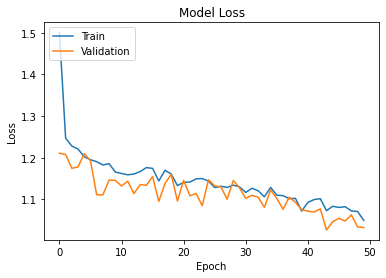

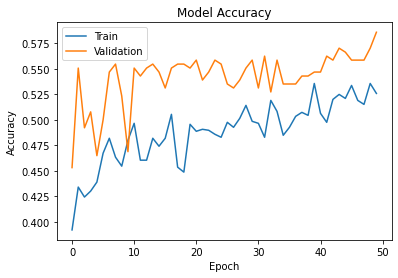

Model is not overfitting
Model is not overfitting


In [18]:

modela = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 308, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units = 308, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units = 308, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units = 308, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units = 308, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units = 308, activation='relu'),
    tf.keras.layers.Dropout(0.2),     
    tf.keras.layers.Dense(units=6, activation='softmax')
]) 

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate =  0.0003987720809096887)
modela.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model
history = modela.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=0)



# Evaluate the performance of the model on the test set
val_loss, val_accuracy = modela.evaluate(X_val, y_val)
print(f"Val Loss: {val_loss}, Val Accuracy: {val_accuracy}")

import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Check for overfitting
if history.history['loss'][-1] < history.history['val_loss'][-1]:
    print("Model is overfitting")
else:
    print("Model is not overfitting")
    
if history.history['accuracy'][-1] > history.history['val_accuracy'][-1]:
    print("Model is overfitting")
else:
    print("Model is not overfitting")

The validation accuracy and loss of the model are also shown, with a validation accuracy of 0.5859375 and a validation loss of 1.032564640045166.

##Top 2 hyperparameters

The model below uses the Top2 hyperparameters chosen by Random Search.

8/8 [==============================] - 0s 7ms/step - loss: 1.1006 - accuracy: 0.5547
Val Loss: 1.1006240844726562, Val Accuracy: 0.5546875


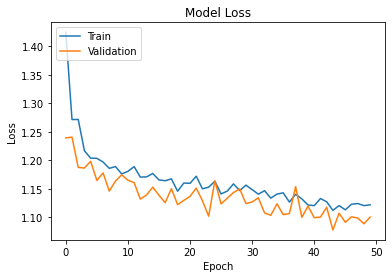

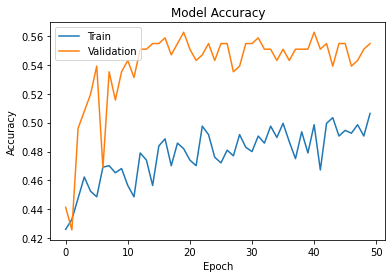

Model is not overfitting
Model is not overfitting


In [19]:
modelb = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 318, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units = 318, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units = 318, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units = 318, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units = 318, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units = 318, activation='relu'),
    tf.keras.layers.Dropout(0.2),
         
    tf.keras.layers.Dense(units=6, activation='softmax')]) 

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.000254849985227742)
modelb.compile(loss='sparse_categorical_crossentropy', optimizer= optimizer, metrics=['accuracy'])

# Train the model
history = modelb.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=0)



# Evaluate the performance of the model on the test set
val_loss, val_accuracy = modelb.evaluate(X_val, y_val)
print(f"Val Loss: {val_loss}, Val Accuracy: {val_accuracy}")

import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Check for overfitting
if history.history['loss'][-1] < history.history['val_loss'][-1]:
    print("Model is overfitting")
else:
    print("Model is not overfitting")
    
if history.history['accuracy'][-1] > history.history['val_accuracy'][-1]:
    print("Model is overfitting")
else:
    print("Model is not overfitting")

The validation accuracy and loss of the model are also shown, with a validation accuracy of 0.5546875 and a validation loss of 1.1006240844726562.

##Top 3 hyperparameters

The model below uses the Top3 hyperparameters chosen by Random Search.

8/8 [==============================] - 0s 3ms/step - loss: 1.0525 - accuracy: 0.5703
Val Loss: 1.0524545907974243, Val Accuracy: 0.5703125


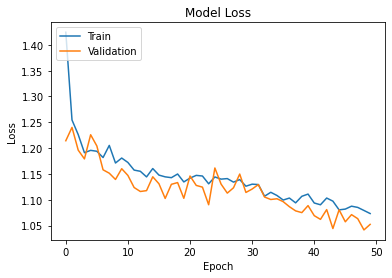

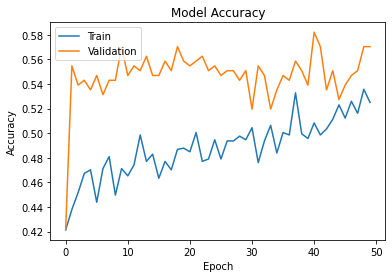

Model is not overfitting
Model is not overfitting


In [20]:
modelc = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 223, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units = 223, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units = 223, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units = 223, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units = 223, activation='relu'),
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(units = 223, activation='relu'),
    tf.keras.layers.Dropout(0.2),     
    tf.keras.layers.Dense(units=6, activation='softmax')
]) 

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0004685026687138719)
modelc.compile(loss='sparse_categorical_crossentropy', optimizer= optimizer, metrics=['accuracy'])

# Train the model
history = modelc.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=0)



# Evaluate the performance of the model on the test set
val_loss, val_accuracy = modelc.evaluate(X_val, y_val)
print(f"Val Loss: {val_loss}, Val Accuracy: {val_accuracy}")

import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Check for overfitting
if history.history['loss'][-1] < history.history['val_loss'][-1]:
    print("Model is overfitting")
else:
    print("Model is not overfitting")
    
if history.history['accuracy'][-1] > history.history['val_accuracy'][-1]:
    print("Model is overfitting")
else:
    print("Model is not overfitting")

The validation accuracy and loss of the model are also shown, with a validation accuracy of 0.5703125 and a validation loss of 1.0524545907974243. This hyperparameter combination has the highest accuracy out of the three, and it is not overfitting.

## Fine-tune epoch and batch size

An epoch in machine learning refers to one complete iteration of the entire dataset through the neural network during the training process. Meanwhile, the batch size is the number of samples processed in one iteration of the neural network. Epoch equals 50 and batch size 32 is used in the previous model; thus, the numbers are double up to see the result.

8/8 [==============================] - 0s 7ms/step - loss: 0.9645 - accuracy: 0.5742
Val Loss: 0.9644837379455566, Val Accuracy: 0.57421875


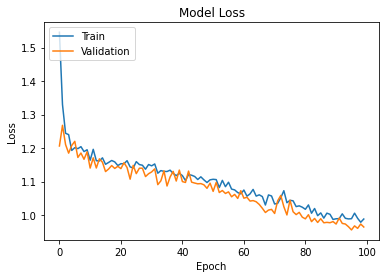

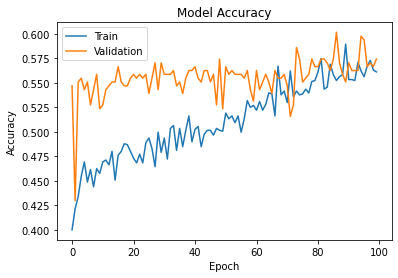

Model is not overfitting
Model is not overfitting


In [22]:
modeld = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 308, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units = 308, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units = 308, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units = 308, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units = 308, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units = 308, activation='relu'),
    tf.keras.layers.Dropout(0.2),     
    tf.keras.layers.Dense(units=6, activation='softmax')
]) 

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate =  0.0003987720809096887)
modeld.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# Train the model
history = modeld.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val), verbose=0)



# Evaluate the performance of the model on the test set
val_loss, val_accuracy = modeld.evaluate(X_val, y_val)
print(f"Val Loss: {val_loss}, Val Accuracy: {val_accuracy}")

import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Check for overfitting
if history.history['loss'][-1] < history.history['val_loss'][-1]:
    print("Model is overfitting")
else:
    print("Model is not overfitting")
    
if history.history['accuracy'][-1] > history.history['val_accuracy'][-1]:
    print("Model is overfitting")
else:
    print("Model is not overfitting")

From the result, at around epoch 70 the validation set starts to learn better. Thus, the next step is to see what will happen if the epotch increases, and the validation set learns longer.

8/8 [==============================] - 0s 5ms/step - loss: 0.9560 - accuracy: 0.6133
Val Loss: 0.9560198187828064, Val Accuracy: 0.61328125


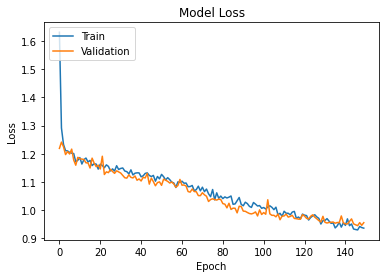

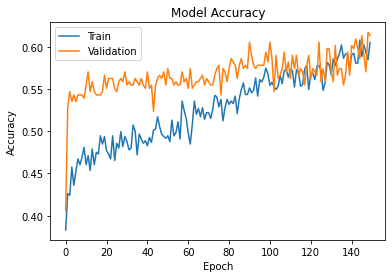

Model is overfitting
Model is not overfitting


In [42]:
modelf = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 308, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units = 308, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units = 308, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units = 308, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units = 308, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units = 308, activation='relu'),
    tf.keras.layers.Dropout(0.2),     
    tf.keras.layers.Dense(units=6, activation='softmax')
]) 

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate =  0.0003987720809096887)
modelf.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model
history = modelf.fit(X_train, y_train, epochs=150, batch_size=96, validation_data=(X_val, y_val), verbose=0)



# Evaluate the performance of the model on the test set
val_loss, val_accuracy = modelf.evaluate(X_val, y_val)
print(f"Val Loss: {val_loss}, Val Accuracy: {val_accuracy}")

import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Check for overfitting
if history.history['loss'][-1] < history.history['val_loss'][-1]:
    print("Model is overfitting")
else:
    print("Model is not overfitting")
    
if history.history['accuracy'][-1] > history.history['val_accuracy'][-1]:
    print("Model is overfitting")
else:
    print("Model is not overfitting")

The model loss drops slightly, but the accuracy improved from 0.57 to 0.61. This is a good sign. Next, the epoch and batch size are both increase to see if the model can imrove more.

8/8 [==============================] - 0s 7ms/step - loss: 0.9515 - accuracy: 0.5742
Val Loss: 0.9514532685279846, Val Accuracy: 0.57421875


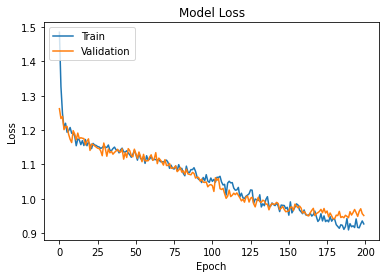

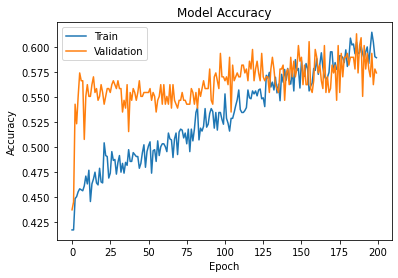

Model is overfitting
Model is overfitting


In [43]:
modelg = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 308, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units = 308, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units = 308, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units = 308, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units = 308, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units = 308, activation='relu'),
    tf.keras.layers.Dropout(0.2),     
    tf.keras.layers.Dense(units=6, activation='softmax')
]) 

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate =  0.0003987720809096887)
modelg.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model
history = modelg.fit(X_train, y_train, epochs=200, batch_size=128, validation_data=(X_val, y_val), verbose=0)



# Evaluate the performance of the model on the test set
val_loss, val_accuracy = modelg.evaluate(X_val, y_val)
print(f"Val Loss: {val_loss}, Val Accuracy: {val_accuracy}")

import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Check for overfitting
if history.history['loss'][-1] < history.history['val_loss'][-1]:
    print("Model is overfitting")
else:
    print("Model is not overfitting")
    
if history.history['accuracy'][-1] > history.history['val_accuracy'][-1]:
    print("Model is overfitting")
else:
    print("Model is not overfitting")

According to the result, in model loss, at around epoch 175 the validation set starts to increase while taining set keeps on decreasing. In the model accuracy, the training set keeps on increasing, but the validation set gradually slows down. Both trends indicate that the model is overfitting. 

Since the previous experiments are base on increasing the batch size, the last try out for fine tuning epoch and batch size is to set epoch at 150, where the model achieved better accuracy earlier, and decrease the batch size.

8/8 [==============================] - 0s 5ms/step - loss: 1.2279 - accuracy: 0.5625
Val Loss: 1.2279415130615234, Val Accuracy: 0.5625


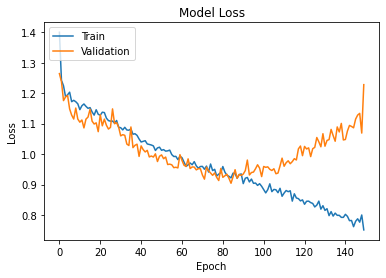

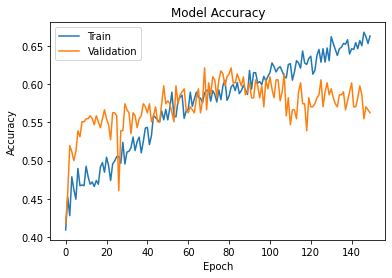

Model is overfitting
Model is overfitting


In [54]:
modelg = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 308, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units = 308, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units = 308, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units = 308, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units = 308, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units = 308, activation='relu'),
    tf.keras.layers.Dropout(0.2),     
    tf.keras.layers.Dense(units=6, activation='softmax')
]) 

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate =  0.0003987720809096887)
modelg.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model
history = modelg.fit(X_train, y_train, epochs=150, batch_size=16, validation_data=(X_val, y_val), verbose=0)



# Evaluate the performance of the model on the test set
val_loss, val_accuracy = modelg.evaluate(X_val, y_val)
print(f"Val Loss: {val_loss}, Val Accuracy: {val_accuracy}")

import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Check for overfitting
if history.history['loss'][-1] < history.history['val_loss'][-1]:
    print("Model is overfitting")
else:
    print("Model is not overfitting")
    
if history.history['accuracy'][-1] > history.history['val_accuracy'][-1]:
    print("Model is overfitting")
else:
    print("Model is not overfitting")

The accuracy slightly decreases, but the Val loss significantly increases.

## Tune Dropout Rate

The dropout rate is a parameter that controls the fraction of neurons that are randomly dropped out during the training process. In the model setup, a dropout rate of 0.2 is set, which means that 20% of the neurons in the network will be randomly dropped out during each training epoch. This technique prevents overfitting by forcing the remaining neurons to learn more independent features.

Below, an increase, decrease and no drop out rate  will be tested to see the result.

8/8 [==============================] - 0s 5ms/step - loss: 1.0811 - accuracy: 0.5430
Val Loss: 1.0811272859573364, Val Accuracy: 0.54296875


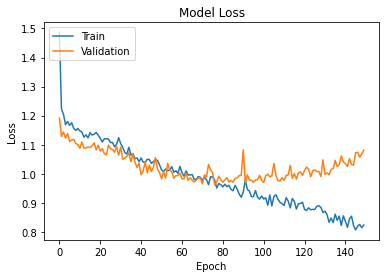

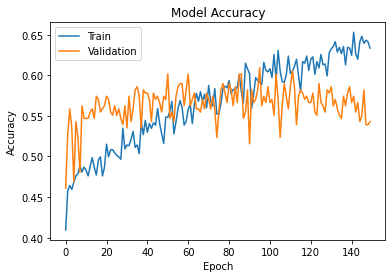

Model is overfitting
Model is overfitting


In [48]:
modeli = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 308, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(units = 308, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(units = 308, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(units = 308, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(units = 308, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(units = 308, activation='relu'),
    tf.keras.layers.Dropout(0.1),     
    tf.keras.layers.Dense(units=6, activation='softmax')
]) 

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate =  0.0003987720809096887)
modeli.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model
history = modeli.fit(X_train, y_train, epochs=150, batch_size=96, validation_data=(X_val, y_val), verbose=0)



# Evaluate the performance of the model on the test set
val_loss, val_accuracy = modeli.evaluate(X_val, y_val)
print(f"Val Loss: {val_loss}, Val Accuracy: {val_accuracy}")

import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Check for overfitting
if history.history['loss'][-1] < history.history['val_loss'][-1]:
    print("Model is overfitting")
else:
    print("Model is not overfitting")
    
if history.history['accuracy'][-1] > history.history['val_accuracy'][-1]:
    print("Model is overfitting")
else:
    print("Model is not overfitting")

8/8 [==============================] - 0s 4ms/step - loss: 0.9878 - accuracy: 0.5664
Val Loss: 0.9878419637680054, Val Accuracy: 0.56640625


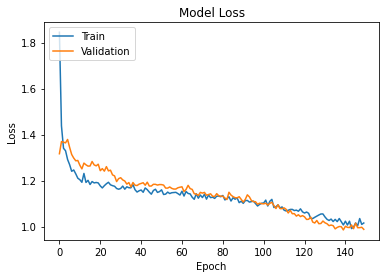

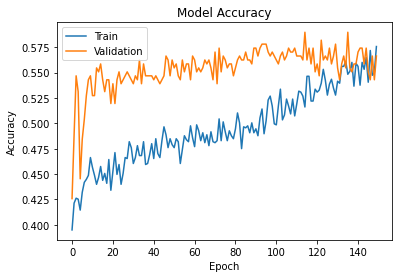

Model is not overfitting
Model is overfitting


In [49]:
modelj = tf.keras.models.Sequential([
        tf.keras.layers.Dense(units = 308, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(units = 308, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(units = 308, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(units = 308, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(units = 308, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(units = 308, activation='relu'),
    tf.keras.layers.Dropout(0.3),     
    tf.keras.layers.Dense(units=6, activation='softmax')
]) 

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate =  0.0003987720809096887)
modelj.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# Train the model
history = modelj.fit(X_train, y_train, epochs=150, batch_size=96, validation_data=(X_val, y_val), verbose=0)



# Evaluate the performance of the model on the test set
val_loss, val_accuracy = modelj.evaluate(X_val, y_val)
print(f"Val Loss: {val_loss}, Val Accuracy: {val_accuracy}")

import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Check for overfitting
if history.history['loss'][-1] < history.history['val_loss'][-1]:
    print("Model is overfitting")
else:
    print("Model is not overfitting")
    
if history.history['accuracy'][-1] > history.history['val_accuracy'][-1]:
    print("Model is overfitting")
else:
    print("Model is not overfitting")

8/8 [==============================] - 0s 6ms/step - loss: 1.6598 - accuracy: 0.5625
Val Loss: 1.6597614288330078, Val Accuracy: 0.5625


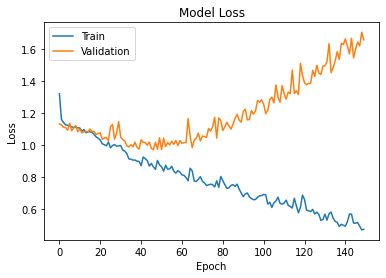

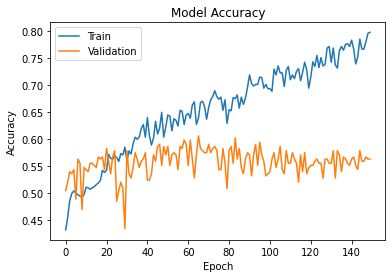

Model is overfitting
Model is overfitting


In [50]:
modelk = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 308, activation='relu', input_shape=(X_train.shape[1],)),

    tf.keras.layers.Dense(units = 308, activation='relu'),

    tf.keras.layers.Dense(units = 308, activation='relu'),

    tf.keras.layers.Dense(units = 308, activation='relu'),

    tf.keras.layers.Dense(units = 308, activation='relu'),

    tf.keras.layers.Dense(units = 308, activation='relu'),

    tf.keras.layers.Dense(units=6, activation='softmax')
]) 

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate =  0.0003987720809096887)
modelk.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# Train the model
history = modelk.fit(X_train, y_train, epochs=150, batch_size=96, validation_data=(X_val, y_val), verbose=0)



# Evaluate the performance of the model on the test set
val_loss, val_accuracy = modelk.evaluate(X_val, y_val)
print(f"Val Loss: {val_loss}, Val Accuracy: {val_accuracy}")

import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Check for overfitting
if history.history['loss'][-1] < history.history['val_loss'][-1]:
    print("Model is overfitting")
else:
    print("Model is not overfitting")
    
if history.history['accuracy'][-1] > history.history['val_accuracy'][-1]:
    print("Model is overfitting")
else:
    print("Model is not overfitting")

When comparing different dropout rates in a neural network, it becomes clear that the absence of dropout performs the worst on Val loss, indicating that the dropout rate technique successfully improves the overfitting issue. Moreover, the choice of dropout rate depends on the specific problem, the size of the network, and the size of the training set; thus, purely increasing or decreasing the rate can not guarantee in the increasement of accuracy.

# Other approach to increase accuracy

Since the highest accuracy the model can get now is 0.61, meaning that the model can only predict the correct class label for 61% of the validation samples, and the model misclassified the remaining 39% of samples. This is not a high number; thus, a feature selection approach is made to see if it can improve the accuracy. 

## PCA for feature selection

Feature selection selects a subset of relevant features from a more extensive set of features available in the dataset. The goal of feature selection is to reduce the dimensionality of the dataset and improve the model's performance.

PCA can be used for feature selection by selecting only the first few principal components that capture most of the variance in the data. This can be helpful when working with high-dimensional data where many features may be less informative or redundant. By selecting only the most important principal components, it can reduce the dimensionality of the data and simplify the subsequent analysis. 

The number of dimensions that preserved 95% variance in the data is: 9


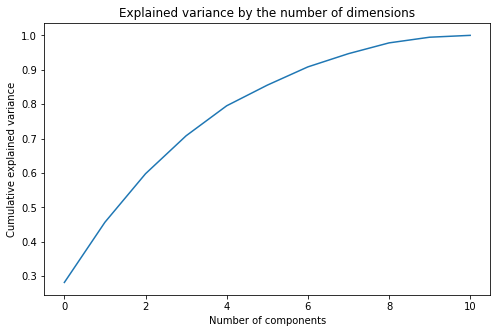

In [29]:
# create a PCA object
# we want to preserve 95% of variance in the data 
pca = PCA(n_components=0.95)
# create standardscaler

scaler = StandardScaler()

winequality_X = winequality.drop('quality', axis=1)

# fit the scaler to the data and transform it
scaled_data = scaler.fit_transform(winequality_X) # fit the PCA object to the scaled data
pca.fit(scaled_data)

# transform the data into the new PCA space
pca_data = pca.transform(scaled_data)

# see the number of dimenstion that preserved the highest variance

print("The number of dimensions that preserved 95% variance in the data is:", pca.n_components_)

# plot cumulative sum of explained variance by dimension
pca = PCA().fit(scaled_data)
figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance') 
plt.title("Explained variance by the number of dimensions") 
plt.show()


To preserve 95% of the data, 9 features are chosen out of 11.

In [30]:
pc1 = pca.components_[0]
print(pc1)


[ 0.48931422 -0.23858436  0.46363166  0.14610715  0.21224658 -0.03615752
  0.02357485  0.39535301 -0.43851962  0.24292133 -0.11323206]


The first principal component is the direction in the feature space that explains the most variance in the data, and by printing out pc1, the coefficient between the original features and pc1 can be seen.

In order to see the result of reducing two features according to PCA, the two least related features are drop from the origin winequality dataset.

In [31]:
# Compute the absolute values of the weights in pc1
abs_pc1 = abs(pc1)

# Sort the absolute values in descending order and get the indices
sorted_indices = abs_pc1.argsort()[::-1]

# Identify the indices of the two smallest absolute values
drop_indices = sorted_indices[-2:]

# Drop the corresponding features from the original dataset
X_pca_new = winequality_X.drop(winequality_X.columns[drop_indices], axis=1)

X_pca_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,0.99547,3.57,0.71,10.2


To see the result of the new dataset, the whole machine learning process will be run again below with "X_pca_new" (nine variables) data instead of "winequality"(eleven variables).

In [32]:
X_pca = X_pca_new
y_pca = winequality['quality']

In [33]:
# shuffle the data
X_pca, y_pca = shuffle(X_pca, y_pca, random_state=52)

In [34]:
# Split the dataset into training and testing sets
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y_pca, test_size=0.2, random_state=52)

# Split the training set into training and validation sets
X_pca_train, X_pca_val, y_pca_train, y_pca_val = train_test_split(X_pca_train, y_pca_train, test_size=0.2, random_state=52)

# Print the shapes of the resulting datasets
print(f"X_pca_train shape: {X_pca_train.shape}")
print(f"y_pca_train shape: {y_pca_train.shape}")
print(f"X_pca_val shape: {X_pca_val.shape}")
print(f"y_pca_val shape: {y_pca_val.shape}")
print(f"X_pca_test shape: {X_pca_test.shape}")
print(f"y_pca_test shape: {y_pca_test.shape}")

X_pca_train shape: (1023, 9)
y_pca_train shape: (1023,)
X_pca_val shape: (256, 9)
y_pca_val shape: (256,)
X_pca_test shape: (320, 9)
y_pca_test shape: (320,)


In [35]:
scaler = StandardScaler()
X_pca_train_scaled = scaler.fit_transform(X_pca_train)
X_pca_val_scaled = scaler.transform(X_pca_val)
X_pca_test_scaled = scaler.transform(X_pca_test)

In [36]:
# Search for the best hyperparameters
tuner.search(X_pca_train, y_pca_train, epochs=50, validation_data=(X_pca_val, y_pca_val))

# Get the best hyperparameters and the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)


In [37]:
top3_params = tuner.get_best_hyperparameters(num_trials=3)

for i, hyperparameters in enumerate(top3_params):
    print(f"--- Top {i+1} Hyperparameters ---")
    print(f"Learning Rate: {hyperparameters.get('learning_rate')}")
    print(f"Number of Neurons: {hyperparameters.get('n_neurons')}")
    print(f"Optimizer: {hyperparameters.get('optimizer')}")
    print(f"Number of Layers: {hyperparameters.get('n_hidden')}")

--- Top 1 Hyperparameters ---
Learning Rate: 0.0003987720809096887
Number of Neurons: 308
Optimizer: adam
Number of Layers: 6
--- Top 2 Hyperparameters ---
Learning Rate: 0.000254849985227742
Number of Neurons: 318
Optimizer: adam
Number of Layers: 6
--- Top 3 Hyperparameters ---
Learning Rate: 0.0004685026687138719
Number of Neurons: 223
Optimizer: adam
Number of Layers: 6


8/8 [==============================] - 0s 4ms/step - loss: 0.9196 - accuracy: 0.5859
Val Loss: 0.9195565581321716, Val Accuracy: 0.5859375


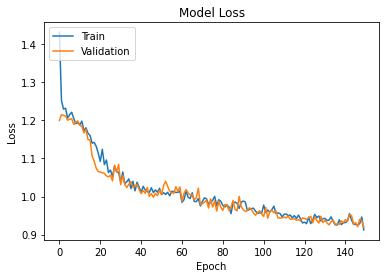

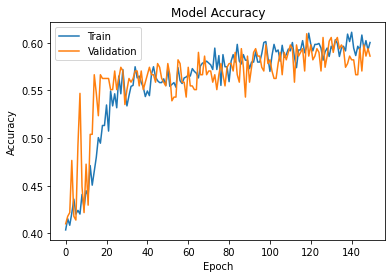

Model is overfitting
Model is overfitting


In [51]:
modell = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 308, activation='relu', input_shape=(X_pca_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units = 308, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units = 308, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units = 308, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units = 308, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units = 308, activation='relu'),
    tf.keras.layers.Dropout(0.2),     
    tf.keras.layers.Dense(units=6, activation='softmax')
]) 

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate =  0.0003987720809096887)
modell.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model
history = modell.fit(X_pca_train, y_pca_train, epochs=150, batch_size=96, validation_data=(X_pca_val, y_pca_val), verbose=0)



# Evaluate the performance of the model on the test set
val_loss, val_accuracy = modell.evaluate(X_pca_val, y_pca_val)
print(f"Val Loss: {val_loss}, Val Accuracy: {val_accuracy}")

import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# Check for overfitting
if history.history['loss'][-1] < history.history['val_loss'][-1]:
    print("Model is overfitting")
else:
    print("Model is not overfitting")
    
if history.history['accuracy'][-1] > history.history['val_accuracy'][-1]:
    print("Model is overfitting")
else:
    print("Model is not overfitting")

Even though the validation set seems to learn well, the accuracy is 0.58, still a bit lower than the the previous best result (0.61).

#Present solution for testing data

Plug the test set to the tuned model that has the highest accuracy, which is model "modeld".

In [52]:
test_loss, test_accuracy = modeld.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


10/10 [==============================] - 0s 5ms/step - loss: 1.0608 - accuracy: 0.5281
Test Loss: 1.0607668161392212, Test Accuracy: 0.528124988079071


#Summary

The project begins by importing and exploring the data with the goal of predicting the quality of red wine using an MLP multi-class classification model. In the process, Random Search is used to find the best combination of hyperparameters, fine-tuning is done on epoch and batch size, and the dropout rate is adjusted. Additionally, PCA is used to explore whether feature selection can improve accuracy, and a model is built on the new data set.

The best combination of hyperparameters is determined to be a Learning Rate of 0.0003987720809096887, 308 neurons, Adam optimizer, 6 layers, 150 epochs, and a batch size of 96. The accuracy achieved 0.61, with a validation loss of 0.95. From 0.46 (the first model) to 0.61 the model improves 33%. However, the result can stil be improve, as the accuracy of 0.61 is not particularly high. When evaluating the test data, the accuracy is only around 0.52.

To improve the results, further analysis of using other accuracy matrics (precision, recall, or F1-score) and addressing the right skewed data, may be helpful. Overall, the project provides a good foundation for future work in optimizing neural network models for wine quality prediction.

# Resources

https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

